# Global Power Plant

## Linear Regression Recap

In [ ]:
#-----------------------------------------------------------------------------------------
# Name:        Practice Day 11
# Author:      Erick Rico
# Created:     29/08/2025
#-----------------------------------------------------------------------------------------

### 1. Configuración del Entorno:

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv("global_power_plant_database.csv")

### 2. Preparación de los Datos:

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.32,65.12,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,"2,017.00",NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.56,69.48,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,"2,017.00",NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.64,69.72,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,"2,017.00",NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.48,70.36,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,"2,017.00",NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.56,69.11,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,"2,017.00",NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
29905,ZMB,Zambia,Ndola,WRI1022386,50.00,-12.97,28.63,Oil,NaN,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1089529,NaN,NaN,NaN,NaN,NaN,NaN,120.87
29906,ZMB,Zambia,Nkana,WRI1022384,20.00,-12.82,28.20,Oil,NaN,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1043097,NaN,NaN,NaN,NaN,NaN,NaN,48.35
29907,ZMB,Zambia,Victoria Falls,WRI1022380,108.00,-17.92,25.85,Hydro,NaN,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1033763,NaN,NaN,NaN,NaN,NaN,NaN,702.10
29908,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.00,-18.38,26.47,Coal,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1033856,"2,017.00",NaN,NaN,NaN,NaN,NaN,"4,397.00"
29909,ZWE,Zimbabwe,Kariba Dam South Hydroelectric Power Station Z...,GEODB0003803,750.00,-16.52,28.76,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1033857,"2,017.00",NaN,NaN,NaN,NaN,NaN,"5,431.00"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29910 entries, 0 to 29909
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   29910 non-null  object 
 1   country_long              29910 non-null  object 
 2   name                      29910 non-null  object 
 3   gppd_idnr                 29910 non-null  object 
 4   capacity_mw               29910 non-null  float64
 5   latitude                  29910 non-null  float64
 6   longitude                 29910 non-null  float64
 7   primary_fuel              29910 non-null  object 
 8   other_fuel1               1963 non-null   object 
 9   other_fuel2               303 non-null    object 
 10  other_fuel3               104 non-null    object 
 11  commissioning_year        16303 non-null  float64
 12  owner                     19531 non-null  object 
 13  source                    29895 non-null  object 
 14  url   

In [10]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.isna().any().any()

np.True_

In [8]:
df.duplicated().any()

np.False_

In [35]:
df_selected = df[["country","commissioning_year", "capacity_mw"]].copy()

In [36]:
df_selected["commissioning_year"].isna().any().sum()

np.int64(1)

In [37]:
df_selected[df_selected.isna().any(axis=1)]

,country,commissioning_year,capacity_mw
0,AFG,NaN,33.00
1,AFG,NaN,66.00
2,AFG,NaN,100.00
3,AFG,NaN,11.55
4,AFG,NaN,42.00
...,...,...,...
29905,ZMB,NaN,50.00
29906,ZMB,NaN,20.00
29907,ZMB,NaN,108.00
29908,ZWE,NaN,920.00


In [38]:
df_selected["commissioning_year"].isna().sum()

np.int64(13607)

In [39]:
df_selected.shape

(29910, 3)

In [40]:
df_clean = df_selected.dropna().copy()
df_clean.shape

(16303, 3)

In [41]:
df_clean = df_clean.query("commissioning_year >= 1950").copy()
df_clean.shape

(15375, 3)

### 3. Visualización de la Relación:

<Axes: xlabel='commissioning_year', ylabel='capacity_mw'>

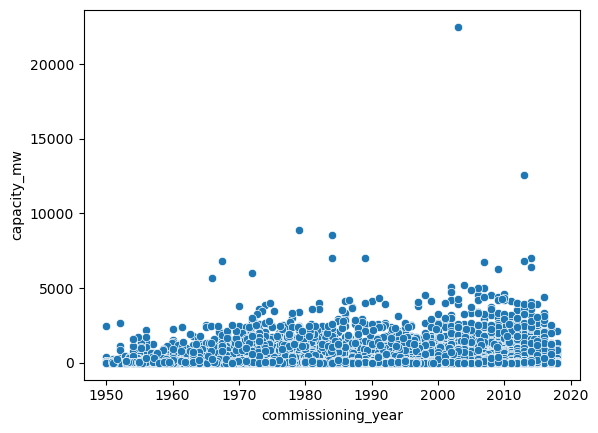

In [42]:
sns.scatterplot(df_clean,
                x="commissioning_year",
                y="capacity_mw")

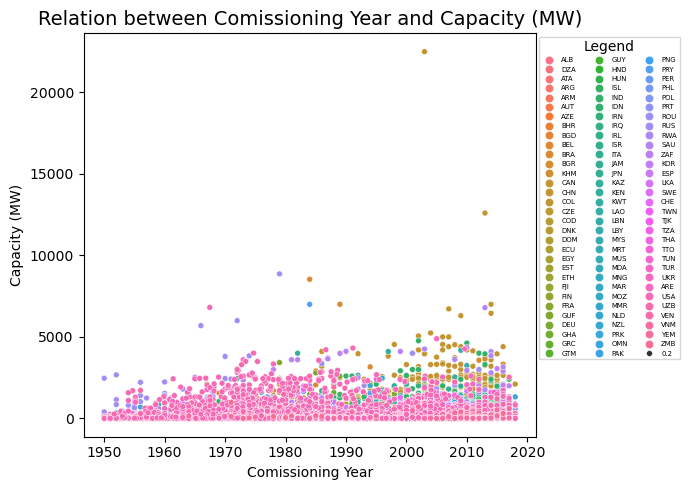

In [71]:
plt.figure(figsize=(7, 5), dpi=100)

sns.scatterplot(df_clean,
                x="commissioning_year",
                y="capacity_mw",
                hue="country",
                size=0.2)

plt.title("Relation between Comissioning Year and Capacity (MW)", fontsize=14)
plt.xlabel("Comissioning Year", fontsize=10)
plt.ylabel("Capacity (MW)", fontsize=10)

plt.legend(fontsize=5, 
           ncol=3, 
           loc="upper left", 
           bbox_to_anchor=(1, 1),
           title="Legend")

plt.tight_layout()
plt.show()


In [65]:
# Muestreo aleatorio
df_clean_sample = df_clean.sample(1000)

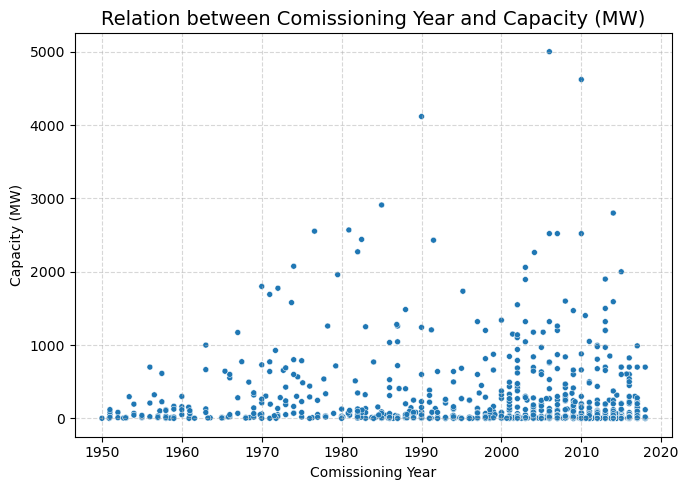

In [75]:
plt.figure(figsize=(7, 5), dpi=100)

sns.scatterplot(df_clean_sample,
                x="commissioning_year",
                y="capacity_mw",
                size=0.2)

plt.title("Relation between Comissioning Year and Capacity (MW)", fontsize=14)
plt.xlabel("Comissioning Year", fontsize=10)
plt.ylabel("Capacity (MW)", fontsize=10)

plt.legend().remove()

plt.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.show()


La relación no es muy clara en este gráfico:

- Hay mucha dispersión en los puntos y no se observa una tendencia lineal fuerte entre el año de puesta en marcha (commissioning_year) y la capacidad (capacity_mw).
- La mayoría de las plantas tienen capacidades bajas, y solo unos pocos puntos tienen capacidades muy altas.

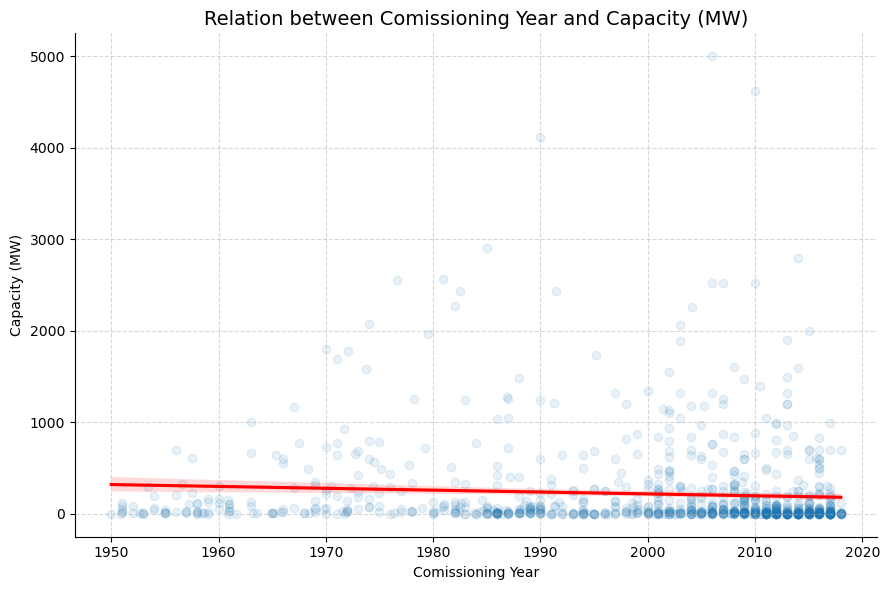

In [ ]:
# Muestra
sns.lmplot(df_clean_sample,
           x="commissioning_year",
           y="capacity_mw",
           fit_reg=True,
           scatter_kws={"alpha":0.1},
           line_kws={"color":"red"},
           height=6,      # alto en pulgadas
           aspect=1.5)       # ancho = alto * aspect

plt.title("Relation between Comissioning Year and Capacity (MW)", fontsize=14)
plt.xlabel("Comissioning Year", fontsize=10)
plt.ylabel("Capacity (MW)", fontsize=10)

plt.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.show()


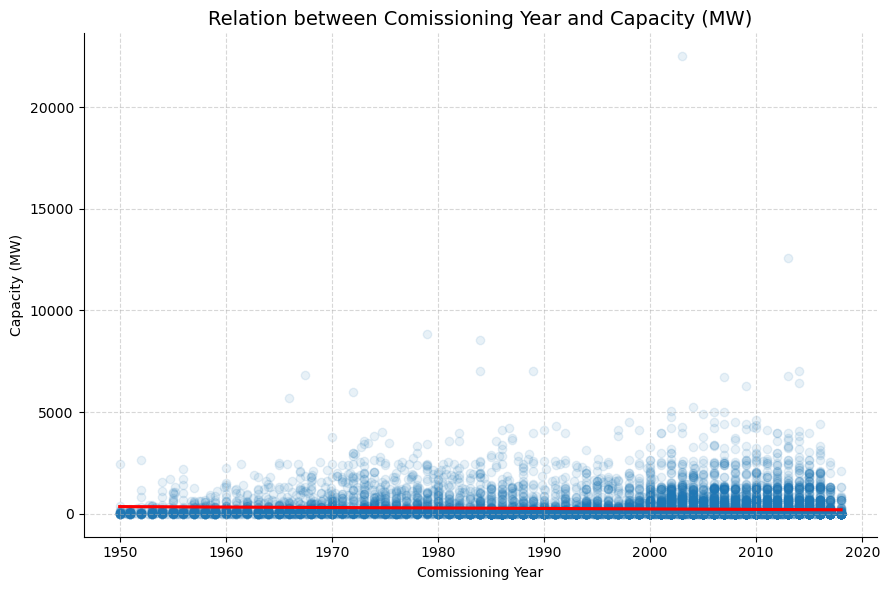

In [85]:
# Original
sns.lmplot(df_clean,
           x="commissioning_year",
           y="capacity_mw",
           fit_reg=True,
           scatter_kws={"alpha":0.1},
           line_kws={"color":"red"},
           height=6,      # alto en pulgadas
           aspect=1.5)       # ancho = alto * aspect

plt.title("Relation between Comissioning Year and Capacity (MW)", fontsize=14)
plt.xlabel("Comissioning Year", fontsize=10)
plt.ylabel("Capacity (MW)", fontsize=10)

plt.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.show()

- La relación entre commissioning_year y capacity_mw es muy débil o casi nula.
- La pendiente negativa leve y la banda de confianza estrecha refuerzan que el efecto es pequeño y probablemente no relevante en la práctica.
- Para confirmarlo, se revisará el coeficiente y el R² con scikit-learn en la siguiente sección.

### 4. Implementación del Modelo de Regresión:

In [87]:
regr = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(df_clean, columns=["commissioning_year"])
 
# Response Variable or Target
y = pd.DataFrame(df_clean, columns=["capacity_mw"]) 

# Encontrar la llamada best-fit line
regr.fit(X, y)

# Resultados
print(f"El coeficiente de la pendiente es: {regr.coef_[0][0]:.4f}")
print(f"El intercepto es: {regr.intercept_[0]:.4f}")
print(f"El valor de R^2 es: {regr.score(X,y) * 100:.4f}%")

El coeficiente de la pendiente es: -2.3073
El intercepto es: 4856.6550
El valor de R^2 es: 0.4471%


Los resultados confirman que no hay relación significativa:

- Coeficiente de la pendiente: -2.3 (muy pequeño, casi plano).
- Intercepto: 4856.65 (valor inicial, no relevante para la relación).
- R²: 0.4471% (muy bajo, casi nulo).